In [14]:
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df1=pd.DataFrame(columns = ['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence', 'Length', 'Width', 'Depth', 'Price'])

In [ ]:
#15개 page
me = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'}

url1 = requests.get('https://capitalwholesalediamonds.com/product-tag/natural/page/4/?orderby=date&filters=price%5B20000_70000%5D', headers=me)
html1 = BeautifulSoup(url1.text, features="html.parser")

In [ ]:
a = html1.find_all('div', class_='ftc-product product')
# url2 = requests.get(a[2].find('div', class_='images').find('a')['href'], headers=me)
a[0]

<div class="ftc-product product">
<div class="images ">
<a href="https://capitalwholesalediamonds.com/product/0-91-ct-cushion-27/">
<span class="no-image"><img alt="Placeholder" class="woocommerce-placeholder wp-post-image" height="300" loading="lazy" sizes="(max-width: 300px) 100vw, 300px" src="https://capitalwholesalediamonds.com/wp-content/uploads/woocommerce-placeholder.png" srcset="https://capitalwholesalediamonds.com/wp-content/uploads/woocommerce-placeholder.png 300w, https://capitalwholesalediamonds.com/wp-content/uploads/woocommerce-placeholder-600x600.png 600w, https://capitalwholesalediamonds.com/wp-content/uploads/woocommerce-placeholder-1024x1024.png 1024w, https://capitalwholesalediamonds.com/wp-content/uploads/woocommerce-placeholder-150x150.png 150w, https://capitalwholesalediamonds.com/wp-content/uploads/woocommerce-placeholder-768x768.png 768w, https://capitalwholesalediamonds.com/wp-content/uploads/woocommerce-placeholder-100x100.png 100w" width="300"/></span>
</a>
<

In [ ]:
#Image id
# url_id = a[1].find('div', class_='item-description').text.split('\n')[-2].strip()
url_id = a[1].find('div', class_='item-description')
url_id

<div class="item-description">
			1754997			<h3 class="product_title product-name"><a href="https://capitalwholesalediamonds.com/product/0-91-ct-cushion-27/">0.91 CT CUSHION</a></h3><div class="product-categories"><span></span><a href="https://capitalwholesalediamonds.com/product-category/cushion/" rel="tag">CUSHION</a></div><div class="meta_info"><div class="add-to-cart add_to_cart_button"><a class="button product_type_simple add_to_cart_button ajax_add_to_cart" data-product_id="486086" data-product_sku="1754997" data-quantity="1" href="?add-to-cart=486086" rel="nofollow">
<span class="ftc-tooltip button-tooltip">Add to cart</span></a></div><a class="compare" data-product_id="486086" href="https://capitalwholesalediamonds.com?action=yith-woocompare-add-product&amp;id=486086"><i class="icon-refresh"></i><span class="ftc-tooltip button-tooltip">Compare</span></a><div class="yith-wcwl-add-to-wishlist add-to-wishlist-486086 "><a class="add_to_wishlist wishlist" data-product-id="486086" da

In [ ]:
#image 원본
url_image = str(a[0].find('div', class_='images').find('span', class_='no-image')).split('src=')[1].split('"')[1]
url_image.split('.')[-1]

'jpg'

In [ ]:
#image 다운
urllib.request.urlretrieve(url_image, "C:/Diamond_images/{}.jpg".format(url_id))

('201212-8.jpg', <http.client.HTTPMessage at 0x7f758b380f90>)

In [ ]:
#각 diamond 상세 페이지
url2 = requests.get(html1.find_all('div', class_='ftc-product product')[2].find('div', class_='images').find('a')['href'], headers=me)
html2 = BeautifulSoup(url2.text, features="html.parser")

In [ ]:
lists1 = []
#Id
lists1.append(html2.find_all('p')[7].text.split('\n')[0].split(':')[1].strip())

#Shpae
lists1.append(html2.find_all('p')[7].text.split('\n')[1].split(':')[1].strip())

#Weight
lists1.append(float(html2.find_all('p')[7].text.split('\n')[2].split(':')[1].strip()))

#Clarity
lists1.append(html2.find_all('p')[7].text.split('\n')[3].split(':')[1].strip())

#Colour
lists1.append(html2.find_all('p')[7].text.split('\n')[4].split(':')[1].strip())

#Cut
lists1.append(html2.find_all('p')[7].text.split('\n')[5].split(':')[1].strip())

#Polish
lists1.append(html2.find_all('p')[7].text.split('\n')[6].split(':')[1].strip())

#Symmetry
lists1.append(html2.find_all('p')[7].text.split('\n')[7].split(':')[1].strip())

#Fluorescence
lists1.append(html2.find_all('p')[7].text.split('\n')[8].split(':')[1].strip())

#Length
lists1.append(float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[0]))

#Width
lists1.append(float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[1].split('×')[0]))

#Depth
lists1.append(float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[1].split('×')[1]))

#Price
lists1.append(float(html2.find_all('p')[5].text[1:3] + html2.find_all('p')[5].text[4:]))

In [ ]:
df1.loc[len(df1)] = lists1
df1

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Length,Width,Depth,Price
0,211201-10,EMERALD,3.51,SI1,K,VG,EX,EX,ST,9.9,7.38,5.12,28995.88


In [ ]:
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import urllib.request

df1=pd.DataFrame(columns = ['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence', 'Length', 'Width', 'Depth', 'Price'])
id_set = set(pd.read_csv('C:\\Diamond_images\\final.csv')['Id'])

id_set = {}
for i in range(1,150) :

    #15개 나오는 페이지
    url1 = requests.get('https://capitalwholesalediamonds.com/product-tag/natural/page/{}/?orderby=date&filters=price%5B20000_70000%5D'.format(i), headers=me)
    html1 = BeautifulSoup(url1.text, features="html.parser")
    a = html1.find_all('div', class_='ftc-product product')
    
    for j in tqdm(range(len(a))) :
        try :
            #이미 있는 Id or .png라면 pass
            url_id = a[j].find('div', class_='item-description').text.split('\n')[-2].strip()
            url_image = str(a[j].find('div', class_='images').find('span', class_='no-image')).split('src=')[1].split('"')[1]
            if url_id in id_set or url_image.split('.')[-1] != 'jpg' :
                continue

            #사진 다운
            urllib.request.urlretrieve(url_image, "C:\\Diamond_images\\{}.jpg".format(url_id))

            #상세페이지
            url2 = requests.get(html1.find_all('div', class_='ftc-product product')[2].find('div', class_='images').find('a')['href'], headers=me)
            html2 = BeautifulSoup(url2.text, features="html.parser")

            #CSV 파일
            lists1 = []
            #Id
            lists1.append(html2.find_all('p')[7].text.split('\n')[0].split(':')[1].strip())

            #Shpae
            lists1.append(html2.find_all('p')[7].text.split('\n')[1].split(':')[1].strip())

            #Weight
            lists1.append(float(html2.find_all('p')[7].text.split('\n')[2].split(':')[1].strip()))

            #Clarity
            lists1.append(html2.find_all('p')[7].text.split('\n')[3].split(':')[1].strip())

            #Colour
            lists1.append(html2.find_all('p')[7].text.split('\n')[4].split(':')[1].strip())

            #Cut
            lists1.append(html2.find_all('p')[7].text.split('\n')[5].split(':')[1].strip())

            #Polish
            lists1.append(html2.find_all('p')[7].text.split('\n')[6].split(':')[1].strip())

            #Symmetry
            lists1.append(html2.find_all('p')[7].text.split('\n')[7].split(':')[1].strip())

            #Fluorescence
            lists1.append(html2.find_all('p')[7].text.split('\n')[8].split(':')[1].strip())

            #Length
            lists1.append(float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[0]))

            #Width
            lists1.append(float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[1].split('×')[0]))

            #Depth
            lists1.append(float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[1].split('×')[1]))

            #Price
            lists1.append(float(html2.find_all('p')[5].text[1:3] + html2.find_all('p')[5].text[4:]))

            df1.loc[len(df1)] = lists1
        except :
            pass
print(df1)
df1.to_csv('C:\\Diamond_image\\append.csv')

In [ ]:
#최종 돌린 것
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import urllib.request

me = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'}

df1 = pd.DataFrame(columns=['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence', 'Length', 'Width', 'Depth', 'Price'])
df2 = pd.read_csv('C:\\Diamond_images\\append.csv')
id_set = set(pd.read_csv('C:\\Diamond_images\\final.csv')['Id'])

for i in tqdm(range(9, 149)):
    try :
        # 15개 나오는 페이지
        url1 = requests.get('https://capitalwholesalediamonds.com/product-tag/natural/page/{}/?orderby=date&filters=price%5B20000_70000%5D'.format(i), headers=me)
        html1 = BeautifulSoup(url1.text, features="html.parser")
        a = html1.find_all('div', class_='ftc-product product')

        for j in range(len(a)):
            try:
                # 이미 있는 Id or .png라면 pass
                url_id = a[j].find('div', class_='item-description').text.split('\n')[-2].strip()
                url_image = str(a[j].find('div', class_='images').find('span', class_='no-image')).split('src=')[1].split('"')[1]
                if url_id in id_set or url_image.split('.')[-1] != 'jpg':
                    continue

                # 사진 다운
                urllib.request.urlretrieve(url_image, "C:\\Diamond_images\\{}.jpg".format(url_id))

                # 상세페이지
                url2 = requests.get(html1.find_all('div', class_='ftc-product product')[j].find('div', class_='images').find('a')['href'],headers=me)
                html2 = BeautifulSoup(url2.text, features="html.parser")

                # CSV 파일
                lists1 = []
                # Id
                lists1.append(html2.find_all('p')[7].text.split('\n')[0].split(':')[1].strip())

                # Shpae
                lists1.append(html2.find_all('p')[7].text.split('\n')[1].split(':')[1].strip())

                # Weight
                lists1.append(float(html2.find_all('p')[7].text.split('\n')[2].split(':')[1].strip()))

                # Clarity
                lists1.append(html2.find_all('p')[7].text.split('\n')[3].split(':')[1].strip())

                # Colour
                lists1.append(html2.find_all('p')[7].text.split('\n')[4].split(':')[1].strip())

                # Cut
                lists1.append(html2.find_all('p')[7].text.split('\n')[5].split(':')[1].strip())

                # Polish
                lists1.append(html2.find_all('p')[7].text.split('\n')[6].split(':')[1].strip())

                # Symmetry
                lists1.append(html2.find_all('p')[7].text.split('\n')[7].split(':')[1].strip())

                # Fluorescence
                lists1.append(html2.find_all('p')[7].text.split('\n')[8].split(':')[1].strip())

                # Length
                lists1.append(float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[0]))

                # Width
                lists1.append(
                    float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[1].split('×')[0]))

                # Depth
                lists1.append(
                    float(html2.find_all('p')[7].text.split('\n')[9].split(':')[1].strip().split('-')[1].split('×')[1]))

                # Price
                lists1.append(float(html2.find_all('p')[5].text[1:3] + html2.find_all('p')[5].text[4:]))

                df1.loc[len(df1)] = lists1

            except:
                pass

        print(df1.tail(15))
    except :
        continue
df1 = pd.concat([df2, df1])
df1.to_csv('C:\\Diamond_images\\append.csv', index = False)

In [45]:
#데이터 확인
df_1 = pd.read_csv('append.csv')

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2136 non-null   object 
 1   Shape         2136 non-null   object 
 2   Weight        2136 non-null   float64
 3   Clarity       2136 non-null   object 
 4   Colour        2136 non-null   object 
 5   Cut           2136 non-null   object 
 6   Polish        2136 non-null   object 
 7   Symmetry      2136 non-null   object 
 8   Fluorescence  2136 non-null   object 
 9   Length        2136 non-null   float64
 10  Width         2136 non-null   float64
 11  Depth         2136 non-null   float64
 12  Price         2136 non-null   float64
dtypes: float64(5), object(8)
memory usage: 217.1+ KB


In [12]:
df_1.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Length,Width,Depth,Price
0,210211-26,EMERALD,5.51,VS1,O-P,EX,EX,EX,F,11.31,8.50,5.78,41613.86
1,211069-30,EMERALD,5.01,SI2,M,EX,EX,EX,N,11.77,8.13,5.33,26256.28
2,210595-6,EMERALD,5.01,VS2,M,VG,EX,EX,N,10.99,8.32,5.62,53764.84
3,210300-52,EMERALD,5.01,VS2,J,VG,EX,EX,M,10.63,8.03,5.63,56407.68
4,210211-15,EMERALD,5.00,VS1,L,VG,EX,EX,N,10.95,8.27,5.78,39042.12


In [52]:
# Shape에 'CUSHION MBR'(63개)이나 'RADIANT'(7개)가 섞여 있습니다.
# Cushion mbr은 cushion cut의 한 종류라서 cushion으로 넣고 radiant는 아예 새로운 cut 종류라 삭제했습니다.
set(df_1['Shape'])

{'CUSHION',
 'CUSHION MBR',
 'EMERALD',
 'HEART',
 'MARQUISE',
 'OVAL',
 'PEAR',
 'PRINCESS',
 'RADIANT',
 'ROUND'}

In [54]:
df_1[df_1['Shape']=='RADIANT']

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Length,Width,Depth,Price
1533,200640-17,RADIANT,4.01,SI1,K,EX,EX,EX,N,10.40,8.12,5.10,44435.40
1708,210034-68,RADIANT,3.00,SI1,J,EX,EX,EX,N,8.14,8.01,5.48,27837.75
1920,211014-51,RADIANT,2.20,SI1,D,EX,EX,EX,N,7.46,7.27,4.89,20982.61
1968,201223-45,RADIANT,2.01,VVS2,H,EX,EX,EX,N,7.98,6.38,4.34,22989.92
2069,200784-213,RADIANT,2.00,VS2,G,EX,EX,EX,N,7.02,6.98,4.76,21903.50
2070,201211-100,RADIANT,2.00,SI1,F,EX,EX,EX,N,7.88,6.27,4.31,22250.16
2071,201223-83,RADIANT,2.00,VS1,F,EX,EX,VG,N,7.97,6.35,4.35,24218.34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


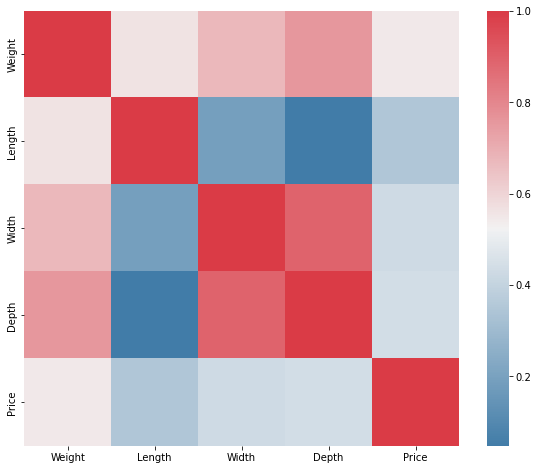

In [30]:
# 여기부터는 진혁님이 plt나 sns 이용한 eda 복붙 했습니다.
f, ax = plt.subplots(figsize=(10, 8))
corr = df_1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


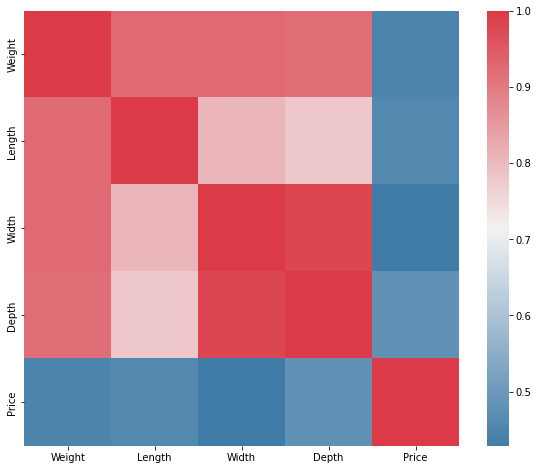

In [31]:
csv_cushion = df_1[df_1.Shape == 'CUSHION']
f, ax = plt.subplots(figsize=(10, 8))
corr = csv_cushion.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

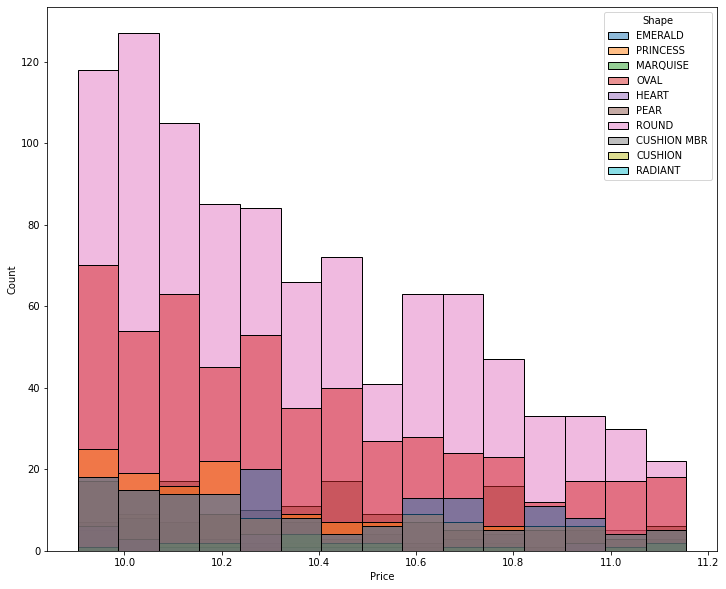

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=df_1, hue = 'Shape')

In [33]:
print("최소 price와 최대 price : ",df_1.Price.min(),df_1.Price.max())

최소 price와 최대 price :  9.90368003401038 11.155692937039001


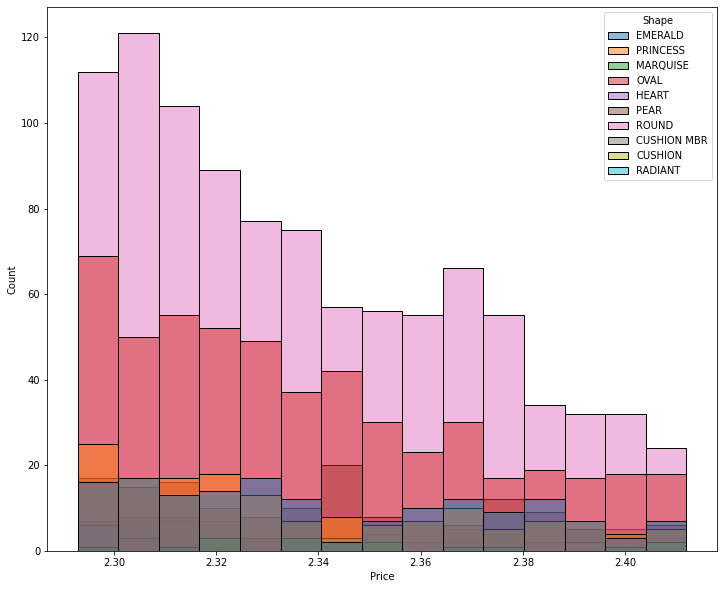

In [34]:
csv_log_price = df_1
csv_log_price['Price'] = csv_log_price.Price.apply(np.log, axis = 1)

fig, axes = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=df_1, hue = 'Shape')

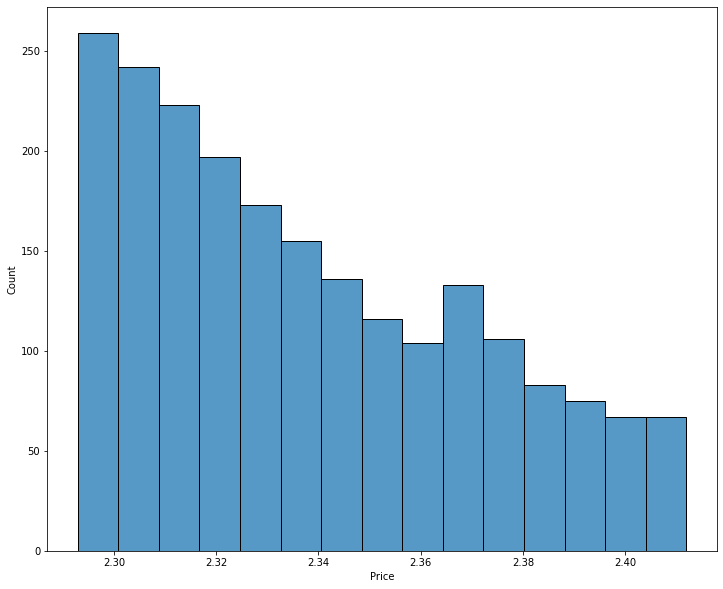

In [35]:
fig, axes = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=df_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


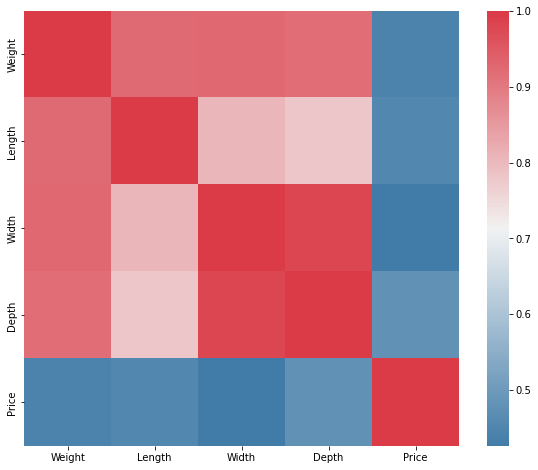

In [36]:
csv_heart = df_1[df_1.Shape == 'CUSHION']
f, ax = plt.subplots(figsize=(10, 8))
corr = csv_heart.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

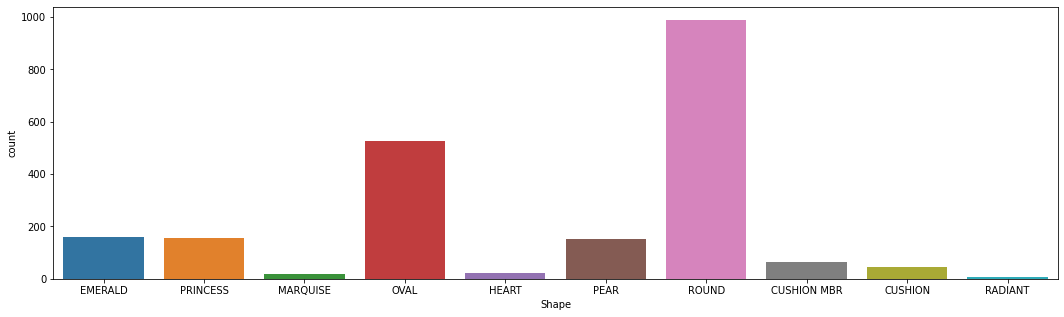

In [37]:
fig, axes = plt.subplots(figsize = (18,5))

sns.countplot(x = 'Shape', data = df_1)

Text(0.5, 1.0, 'MARQUISE')

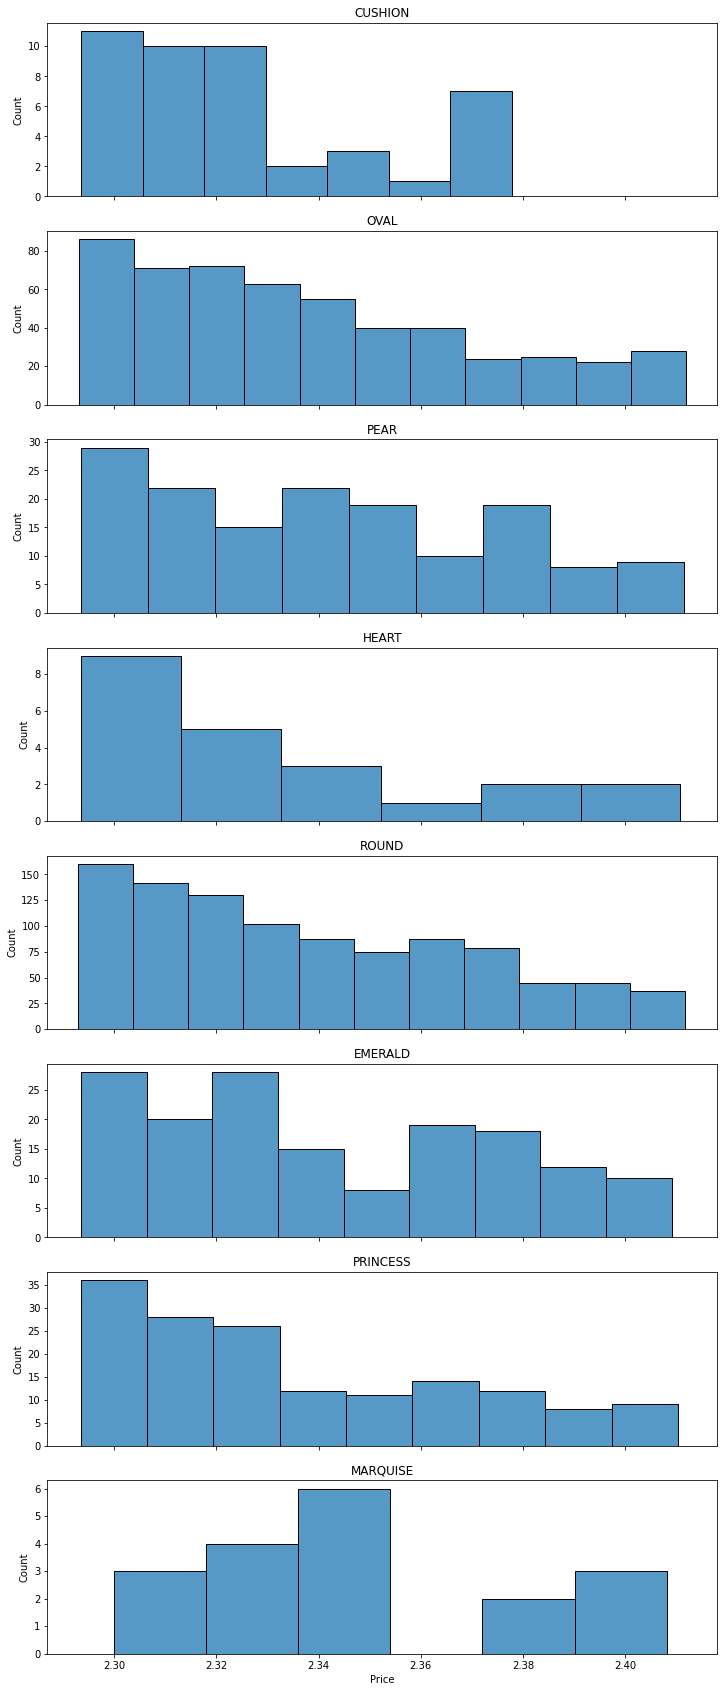

In [38]:
fig, axes = plt.subplots(8,1,figsize=(12, 30), sharex = True)

sns.histplot(x='Price', data=df_1[df_1.Shape == 'CUSHION'], ax = axes[0])
axes[0].set_title('CUSHION')
sns.histplot(x='Price', data=df_1[df_1.Shape == 'OVAL'], ax = axes[1])
axes[1].set_title('OVAL')
sns.histplot(x='Price', data=df_1[df_1.Shape == 'PEAR'], ax = axes[2])
axes[2].set_title('PEAR')
sns.histplot(x='Price', data=df_1[df_1.Shape == 'HEART'], ax = axes[3])
axes[3].set_title('HEART')
sns.histplot(x='Price', data=df_1[df_1.Shape == 'ROUND'], ax = axes[4])
axes[4].set_title('ROUND')
sns.histplot(x='Price', data=df_1[df_1.Shape == 'EMERALD'], ax = axes[5])
axes[5].set_title('EMERALD')
sns.histplot(x='Price', data=df_1[df_1.Shape == 'PRINCESS'], ax = axes[6])
axes[6].set_title('PRINCESS')
sns.histplot(x='Price', data=df_1[df_1.Shape == 'MARQUISE'], ax = axes[7])
axes[7].set_title('MARQUISE')

In [ ]:
import pandas as pd
import glob

# 이미지 개수 2112개
input_path = "C:\\Diamond_images\\*.jpg"
file_list = [f for f in glob.glob(input_path)]
list_1 = []
for c in file_list :
    list_1.append(c.split('\\')[-1].split('.jpg')[0])
print(len(list_1)) # 2112개

# CSV Id 개수 2129개, set으로 만들고 len 해보니 2110개
df__1 = pd.read_csv('C:\\Diamond_images\\append.csv')
list_2 = list(df__1['Id'])
print(len(list_2)) # 2129개
print(len(set(list_2))) # 2110개


list_3 = list_1 + list_2
print(len(set(list_3)))
print(set(list_1)-set(list_2))

# 이미지만 있고 csv id 없는 파일 삭제
print('210016-6' in list_2)
print('M210595-21' in list_2)

# append csv에 있는 중복 id 삭제
df__1 = df__1.drop_duplicates(subset = ['Id'])
df__1.info()
df__1.to_csv('C:\\Diamond_images\\append.csv', index=False)

# 최종 : 이미지 + CSV(중복 없음) 총 개수 2110

전처리는 shape이 cushion mbr인 것을 cushion으로 변경했고, radiant가 7개 나와서 삭제했습니다. 동일하게 사진도 해당하는 id는 삭제해뒀습니다. 이미지만 있고 CSV에는 없는 파일은 삭제하고 csv에 Id가 중복으로 들어가 있는 경우도 제외했습니다.
다만 가격을 20000~70000으로 잡고 거의 모든 보석을 가져와서 나중에 확인해보니 round와 oval이 상당히 많은 것으로 집계된 것 같아서 price 불균형은 잡았지만 shape 불균형이 가속화된 것 아닌가 조금 염려되기는 합니다.
append 최종 개수는 2110개 입니다.
